In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
from matplotlib import colors
import xarray as xr
import numpy as np
from matplotlib.ticker import FuncFormatter
from matplotlib.gridspec import GridSpec
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.colors import LogNorm
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import LogFormatter

In [2]:
basedir = '/xdisk/sylvia/temakgoale/DYAMOND/evaluation/'
#
IMERGE = basedir + 'IMERG_pr_Asia_timeavg_transposed.nc'
IMERGE = xr.open_dataset( IMERGE,decode_times=False)
IMERGE_vals_pr = IMERGE['precipitationCal']
lons_IMERGE = IMERGE.lon
lats_IMERGE = IMERGE.lat
#
ERA5_cwp = basedir + 'ERA5_CWP_Asia_timeavg.nc'
ERA5_cwp = xr.open_dataset( ERA5_cwp)
ERA5_vals_cwp = ERA5_cwp['tciw']
lons_ERA5_cwp = ERA5_cwp.longitude
lats_ERA5_cwp = ERA5_cwp.latitude
#
ERA5_pr = basedir + 'pr_1hr_reanalysis_era5_r1i1p1_20160809-20160909_Asia_mm_hr_timmean_regridded.nc'
ERA5_pr = xr.open_dataset( ERA5_pr)
ERA5_vals_pr = ERA5_pr['pr']
lons_ERA5_pr = ERA5_pr.longitude
lats_ERA5_pr = ERA5_pr.latitude

def resize_colorbar(event):
    plt.draw()

    posn = ax.get_position()
    cbar_ax.set_position([posn.x0 + posn.width + 0.01, posn.y0,
                          0.04, posn.height])
#levs_pr = np.arange(0,2,0.05) # linear levels for a linear colormap
minval = -1.5
maxval = -0.5
levs_pr = np.logspace( minval, maxval, 15 )
minval_cwp = -1.5
maxval_cwp = -0.5
#levs_cwp = np.arange(0,0.5,0.05)# linear levels for a linear colormap
levs_cwp = np.logspace( minval_cwp, maxval_cwp, 15 )

In [3]:
def fmt( x, pos ):
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

[0.03162278 0.03727594 0.04393971 0.05179475 0.06105402 0.07196857
 0.08483429 0.1        0.11787686 0.13894955 0.16378937 0.19306977
 0.22758459 0.26826958 0.31622777]


/home/u32/temakgoale/.conda/envs/mapping/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: Log scale: values of z <= 0 have been masked
  result = super().contourf(*args, **kwargs)
/home/u32/temakgoale/.conda/envs/mapping/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: Log scale: values of z <= 0 have been masked
  result = super().contourf(*args, **kwargs)


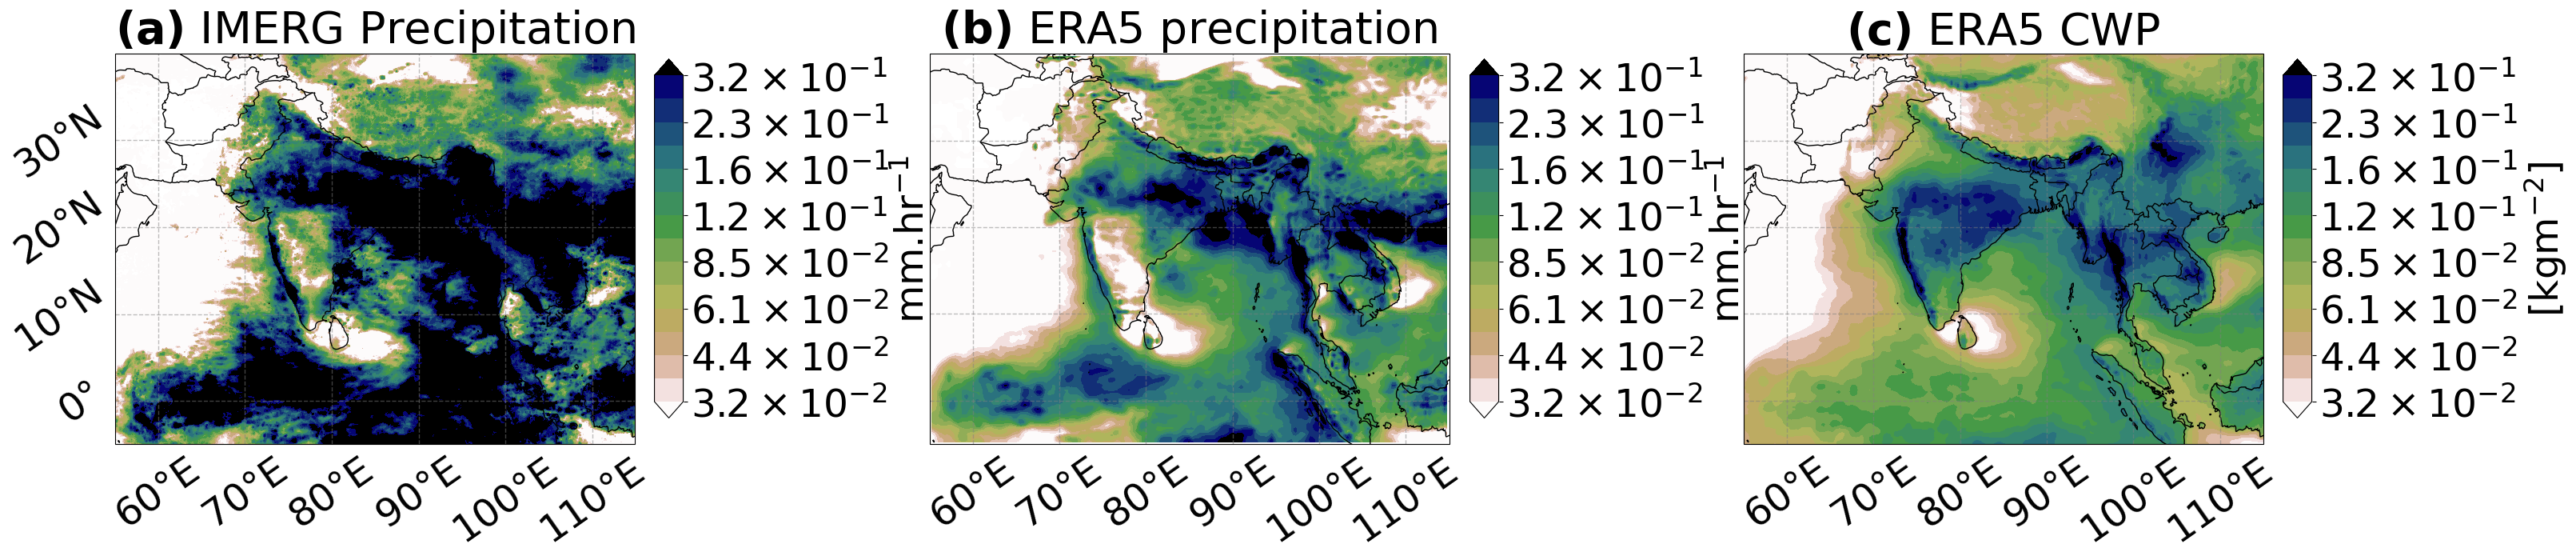

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 6.5), subplot_kw={'projection': ccrs.PlateCarree()})  # ↓ was 30, now 26
plt.subplots_adjust(left=0.01, right=0.95, bottom=0.05, top=0.8, wspace=0.3, hspace=0.1)

# Plot 1: GPM IMERG Precipitation
print(levs_cwp)
im1 = axes[0].contourf(lons_IMERGE, lats_IMERGE, IMERGE_vals_pr[0], levels=levs_pr, cmap='gist_earth_r',
                       norm=LogNorm(vmin=10**minval, vmax=10**maxval), extend='both')
axes[0].set_title(r'$\bf{(a)}$ IMERG Precipitation', size=40)
axes[0].coastlines()
axes[0].add_feature(cf.BORDERS)
gl = axes[0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.xlabel_style = {'size': 35, 'rotation': 35}
gl.ylabel_style = {'size': 35, 'rotation': 35}

# Colorbar for Plot 1
cbar_ax1 = fig.add_axes([0.257, 0.1, 0.012, 0.69])  # Adjusted for 1x3 layout
cbar1 = plt.colorbar(im1, cax=cbar_ax1, shrink=0.8, aspect=20, format=fmt)
cbar1.set_label("mm.hr$^{-1}$", size=35)
cbar1.ax.tick_params(labelsize=35)
#
#########
# Plot 3: Additional Plot (Example)
# Replace this with your third dataset
im2 = axes[1].contourf(lons_ERA5_pr, lats_ERA5_pr, ERA5_vals_pr[0] * 0.5, levels=levs_pr, cmap='gist_earth_r', 
                       norm=colors.LogNorm(vmin=10**minval, vmax=10**maxval), extend='both')  # Example data
axes[1].set_title(r'$\bf{(b)}$ ERA5 precipitation', size=40)
axes[1].coastlines()
axes[1].add_feature(cf.BORDERS)
gl = axes[1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.xlabel_style = {'size': 35, 'rotation': 35}
gl.ylabel_style = {'size': 35, 'rotation': 35}

# Colorbar for Plot 3
cbar_ax2 = fig.add_axes([0.597, 0.1, 0.012, 0.69])
cbar2 = plt.colorbar(im2, cax=cbar_ax2, shrink=0.8, aspect=20, format=fmt)
cbar2.set_label("mm.hr$^{-1}$", size=35)
cbar2.ax.tick_params(labelsize=35)

# Plot 2: ERA5 Cloud Water Path (CWP)
im3 = axes[2].contourf(lons_ERA5_cwp, lats_ERA5_cwp, ERA5_vals_cwp[0], levels=levs_cwp, cmap='gist_earth_r',
                       norm=LogNorm(vmin=10**minval, vmax=10**maxval), extend='both')
axes[2].set_title(r'$\bf{(c)}$ ERA5 CWP', size=40)
axes[2].coastlines()
axes[2].add_feature(cf.BORDERS)
gl = axes[2].gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.xlabel_style = {'size': 35, 'rotation': 35}
gl.ylabel_style = {'size': 35, 'rotation': 35}
# Colorbar for Plot 2
cbar_ax3 = fig.add_axes([0.936, 0.1, 0.012, 0.69])
cbar3 = plt.colorbar(im3, cax=cbar_ax3, shrink=0.8, aspect=20, format=fmt)
cbar3.set_label(r'[kgm$^{-2}$]', size=35)
cbar3.ax.tick_params(labelsize=35)

# Save the figure if needed
plt.savefig('/home/u32/temakgoale/Precipitation_Efficiency_Paper/Figure_1_IMERGE_ERA5_CWP_1x3.png', dpi=200, bbox_inches='tight')
plt.savefig('/home/u32/temakgoale/Precipitation_Efficiency_Paper/Figure_1_IMERGE_ERA5_CWP_1x3.pdf', format='pdf', dpi=200, bbox_inches='tight')

